In [165]:
import pandas as pd

In [166]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding='Latin-1')

In [167]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [168]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [169]:
sales_df.shape

(2823, 25)

In [170]:
df_drop = ['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE', 'TERRITORY','POSTALCODE', 'CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','ORDERNUMBER', 'PHONE','STATUS']

In [171]:
sales_df = sales_df.drop(df_drop, axis=1)

In [172]:
sales_df.shape

(2823, 13)

In [173]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [174]:
sales_df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [175]:
sales_df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [176]:
sales_df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [177]:
sales_df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [178]:
country = pd.get_dummies(sales_df['COUNTRY'])
dealsize = pd.get_dummies(sales_df['DEALSIZE'])
product = pd.get_dummies(sales_df['PRODUCTLINE'])                         

In [179]:
sales_df = pd.concat([sales_df, country, dealsize,product], axis=1)

In [180]:
df_prev =['COUNTRY', 'PRODUCTLINE', 'DEALSIZE']

In [181]:
sales_df = sales_df.drop(df_prev, axis=1)

In [182]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,95,S10_1678,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12/2/2004 0:00,4,12,2004,54,S72_3212,...,False,False,True,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,1/31/2005 0:00,1,1,2005,54,S72_3212,...,False,True,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,3/1/2005 0:00,1,3,2005,54,S72_3212,...,False,True,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,3/28/2005 0:00,1,3,2005,54,S72_3212,...,False,False,True,False,False,False,True,False,False,False


In [183]:
sales_df = sales_df.drop('ORDERDATE', axis=1)

In [184]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [185]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Large,Medium,Small,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,False,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2,5,2003,95,0,False,...,False,False,True,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,3,7,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,3,8,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,4,10,2003,95,0,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,4,12,2004,54,108,False,...,False,False,True,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,1,1,2005,54,108,False,...,False,True,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,1,3,2005,54,108,False,...,False,True,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,1,3,2005,54,108,False,...,False,False,True,False,False,False,True,False,False,False


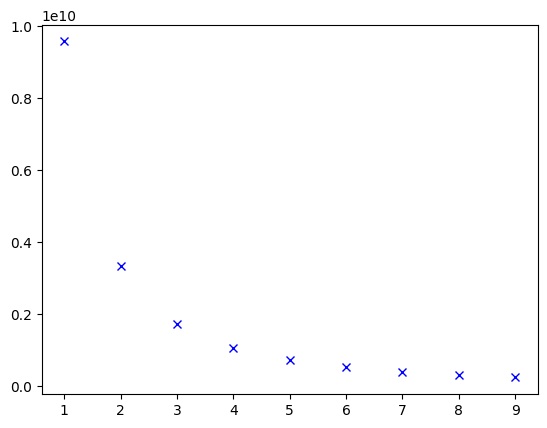

In [186]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortion = []
K1 = range(1,10)
for k in K1:
    km = KMeans(n_clusters=k)
    km.fit(sales_df)
    distortion.append(km.inertia_)
    plt.plot(k, km.inertia_, 'bx-')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

In [192]:
x_train = sales_df.values

In [199]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(x_train)
pred=model.predict(x_train)
pred=pd.DataFrame(pred)

In [201]:
sales_df = pd.concat([sales_df, pred], axis=1)

In [203]:
sales_df.shape

(2823, 39)

In [204]:
import numpy as np
unique,counts = np.unique(pred, return_counts=True)
counts = counts.reshape(1,3)
counts_df=pd.DataFrame(counts, columns=["C1", "C2", "C3"])
counts_df
counts_df.head()

,C1,C2,C3
0,1367,1083,373
